In [1]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [2]:
# Paths to dataset directories
train_dir = r"C:\Users\COMPUMARTS\Downloads\New\Split\train"
validate_dir = r"C:\Users\COMPUMARTS\Downloads\New\Split\validate"
test_dir = r"C:\Users\COMPUMARTS\Downloads\New\Split\test"

In [9]:
img_size = (299, 299)  # Required for Xception
batch_size = 32
learning_rate = 0.001
num_classes = 5  # Number of categories
epochs = 10

In [3]:
def check_image_sizes(directory):
    print(f"Checking image sizes in directory: {directory}")
    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            for img_file in os.listdir(category_path):
                img_path = os.path.join(category_path, img_file)
                try:
                    with Image.open(img_path) as img:
                        print(f"{img_file} - Size: {img.size}")
                except Exception as e:
                    print(f"Error with image {img_file}: {e}")

In [4]:
check_image_sizes(train_dir)

Checking image sizes in directory: C:\Users\COMPUMARTS\Downloads\New\Split\train
Image_100.png - Size: (256, 256)
Image_100_1.png - Size: (256, 256)
Image_100_2.png - Size: (256, 256)
Image_100_3.png - Size: (256, 256)
Image_101.png - Size: (256, 256)
Image_101_1.png - Size: (256, 256)
Image_101_2.png - Size: (256, 256)
Image_101_3.png - Size: (256, 256)
Image_102.png - Size: (256, 256)
Image_102_1.png - Size: (256, 256)
Image_102_2.png - Size: (256, 256)
Image_102_3.png - Size: (256, 256)
Image_103_1.png - Size: (256, 256)
Image_104.png - Size: (256, 256)
Image_104_2.png - Size: (256, 256)
Image_104_3.png - Size: (256, 256)
Image_105.png - Size: (256, 256)
Image_105_1.png - Size: (256, 256)
Image_105_3.png - Size: (256, 256)
Image_106.png - Size: (256, 256)
Image_106_2.png - Size: (256, 256)
Image_106_3.png - Size: (256, 256)
Image_107.png - Size: (256, 256)
Image_107_1.png - Size: (256, 256)
Image_107_2.png - Size: (256, 256)
Image_107_3.png - Size: (256, 256)
Image_108.png - Size: (

Image_190.png - Size: (256, 256)
Image_190_2.png - Size: (256, 256)
Image_191.png - Size: (256, 256)
Image_191_2.png - Size: (256, 256)
Image_191_3.png - Size: (256, 256)
Image_192.png - Size: (256, 256)
Image_192_1.png - Size: (256, 256)
Image_192_2.png - Size: (256, 256)
Image_192_3.png - Size: (256, 256)
Image_193.png - Size: (256, 256)
Image_193_1.png - Size: (256, 256)
Image_193_2.png - Size: (256, 256)
Image_193_3.png - Size: (256, 256)
Image_194.png - Size: (256, 256)
Image_194_1.png - Size: (256, 256)
Image_194_2.png - Size: (256, 256)
Image_195.png - Size: (256, 256)
Image_195_1.png - Size: (256, 256)
Image_196_1.png - Size: (256, 256)
Image_196_2.png - Size: (256, 256)
Image_196_3.png - Size: (256, 256)
Image_197.png - Size: (256, 256)
Image_197_1.png - Size: (256, 256)
Image_197_2.png - Size: (256, 256)
Image_197_3.png - Size: (256, 256)
Image_198.png - Size: (256, 256)
Image_198_1.png - Size: (256, 256)
Image_199.png - Size: (256, 256)
Image_199_1.png - Size: (256, 256)
Ima

Image_50_1.png - Size: (256, 256)
Image_50_2.png - Size: (256, 256)
Image_50_3.png - Size: (256, 256)
Image_51_1.png - Size: (256, 256)
Image_51_2.png - Size: (256, 256)
Image_52.png - Size: (256, 256)
Image_52_2.png - Size: (256, 256)
Image_52_3.png - Size: (256, 256)
Image_53.png - Size: (256, 256)
Image_53_1.png - Size: (256, 256)
Image_53_2.png - Size: (256, 256)
Image_53_3.png - Size: (256, 256)
Image_54.png - Size: (256, 256)
Image_54_1.png - Size: (256, 256)
Image_54_2.png - Size: (256, 256)
Image_55_1.png - Size: (256, 256)
Image_55_2.png - Size: (256, 256)
Image_56.png - Size: (256, 256)
Image_56_1.png - Size: (256, 256)
Image_56_2.png - Size: (256, 256)
Image_56_3.png - Size: (256, 256)
Image_57.png - Size: (256, 256)
Image_57_1.png - Size: (256, 256)
Image_57_3.png - Size: (256, 256)
Image_58.png - Size: (256, 256)
Image_58_1.png - Size: (256, 256)
Image_58_3.png - Size: (256, 256)
Image_59.png - Size: (256, 256)
Image_59_1.png - Size: (256, 256)
Image_59_2.png - Size: (256,

Image_150_1.png - Size: (256, 256)
Image_150_2.png - Size: (256, 256)
Image_150_3.png - Size: (256, 256)
Image_151.png - Size: (256, 256)
Image_151_1.png - Size: (256, 256)
Image_151_2.png - Size: (256, 256)
Image_151_3.png - Size: (256, 256)
Image_152.png - Size: (256, 256)
Image_152_1.png - Size: (256, 256)
Image_152_2.png - Size: (256, 256)
Image_152_3.png - Size: (256, 256)
Image_153.png - Size: (256, 256)
Image_153_2.png - Size: (256, 256)
Image_154.png - Size: (256, 256)
Image_154_1.png - Size: (256, 256)
Image_154_2.png - Size: (256, 256)
Image_154_3.png - Size: (256, 256)
Image_155.png - Size: (256, 256)
Image_155_1.png - Size: (256, 256)
Image_155_2.png - Size: (256, 256)
Image_156_3.png - Size: (256, 256)
Image_157_1.png - Size: (256, 256)
Image_157_2.png - Size: (256, 256)
Image_157_3.png - Size: (256, 256)
Image_158.png - Size: (256, 256)
Image_158_1.png - Size: (256, 256)
Image_158_2.png - Size: (256, 256)
Image_158_3.png - Size: (256, 256)
Image_159.png - Size: (256, 256)

Image_245_1.png - Size: (256, 256)
Image_245_2.png - Size: (256, 256)
Image_245_3.png - Size: (256, 256)
Image_246_2.png - Size: (256, 256)
Image_247.png - Size: (256, 256)
Image_247_1.png - Size: (256, 256)
Image_247_2.png - Size: (256, 256)
Image_247_3.png - Size: (256, 256)
Image_248.png - Size: (256, 256)
Image_248_1.png - Size: (256, 256)
Image_248_2.png - Size: (256, 256)
Image_248_3.png - Size: (256, 256)
Image_249.png - Size: (256, 256)
Image_249_1.png - Size: (256, 256)
Image_249_2.png - Size: (256, 256)
Image_24_1.png - Size: (256, 256)
Image_24_2.png - Size: (256, 256)
Image_24_3.png - Size: (256, 256)
Image_250_1.png - Size: (256, 256)
Image_250_2.png - Size: (256, 256)
Image_250_3.png - Size: (256, 256)
Image_25_1.png - Size: (256, 256)
Image_25_2.png - Size: (256, 256)
Image_26.png - Size: (256, 256)
Image_26_2.png - Size: (256, 256)
Image_26_3.png - Size: (256, 256)
Image_27.png - Size: (256, 256)
Image_27_1.png - Size: (256, 256)
Image_27_2.png - Size: (256, 256)
Image_

Image_13_1.png - Size: (256, 256)
Image_13_3.png - Size: (256, 256)
Image_14.png - Size: (256, 256)
Image_140.png - Size: (256, 256)
Image_140_1.png - Size: (256, 256)
Image_140_2.png - Size: (256, 256)
Image_140_3.png - Size: (256, 256)
Image_141_1.png - Size: (256, 256)
Image_141_2.png - Size: (256, 256)
Image_142_1.png - Size: (256, 256)
Image_143.png - Size: (256, 256)
Image_143_1.png - Size: (256, 256)
Image_143_2.png - Size: (256, 256)
Image_143_3.png - Size: (256, 256)
Image_144.png - Size: (256, 256)
Image_144_1.png - Size: (256, 256)
Image_145.png - Size: (256, 256)
Image_145_1.png - Size: (256, 256)
Image_145_2.png - Size: (256, 256)
Image_145_3.png - Size: (256, 256)
Image_146.png - Size: (256, 256)
Image_146_1.png - Size: (256, 256)
Image_146_2.png - Size: (256, 256)
Image_146_3.png - Size: (256, 256)
Image_147_1.png - Size: (256, 256)
Image_147_2.png - Size: (256, 256)
Image_147_3.png - Size: (256, 256)
Image_148.png - Size: (256, 256)
Image_148_1.png - Size: (256, 256)
Im

Image_249_1.png - Size: (256, 256)
Image_249_2.png - Size: (256, 256)
Image_249_3.png - Size: (256, 256)
Image_24_1.png - Size: (256, 256)
Image_24_2.png - Size: (256, 256)
Image_24_3.png - Size: (256, 256)
Image_25.png - Size: (256, 256)
Image_250.png - Size: (256, 256)
Image_250_1.png - Size: (256, 256)
Image_250_3.png - Size: (256, 256)
Image_25_1.png - Size: (256, 256)
Image_25_2.png - Size: (256, 256)
Image_25_3.png - Size: (256, 256)
Image_26.png - Size: (256, 256)
Image_26_1.png - Size: (256, 256)
Image_26_3.png - Size: (256, 256)
Image_27.png - Size: (256, 256)
Image_27_1.png - Size: (256, 256)
Image_27_2.png - Size: (256, 256)
Image_27_3.png - Size: (256, 256)
Image_28.png - Size: (256, 256)
Image_28_2.png - Size: (256, 256)
Image_28_3.png - Size: (256, 256)
Image_29.png - Size: (256, 256)
Image_29_1.png - Size: (256, 256)
Image_29_2.png - Size: (256, 256)
Image_29_3.png - Size: (256, 256)
Image_2_1.png - Size: (256, 256)
Image_2_2.png - Size: (256, 256)
Image_2_3.png - Size: 

Image_124_2.png - Size: (256, 256)
Image_125.png - Size: (256, 256)
Image_125_1.png - Size: (256, 256)
Image_125_2.png - Size: (256, 256)
Image_125_3.png - Size: (256, 256)
Image_125_4.png - Size: (256, 256)
Image_126.png - Size: (256, 256)
Image_126_1.png - Size: (256, 256)
Image_126_3.png - Size: (256, 256)
Image_126_4.png - Size: (256, 256)
Image_127_3.png - Size: (256, 256)
Image_128.png - Size: (256, 256)
Image_128_2.png - Size: (256, 256)
Image_128_4.png - Size: (256, 256)
Image_129.png - Size: (256, 256)
Image_129_2.png - Size: (256, 256)
Image_129_3.png - Size: (256, 256)
Image_129_4.png - Size: (256, 256)
Image_12_1.png - Size: (256, 256)
Image_12_2.png - Size: (256, 256)
Image_12_3.png - Size: (256, 256)
Image_12_4.png - Size: (256, 256)
Image_13.png - Size: (256, 256)
Image_130.png - Size: (256, 256)
Image_130_1.png - Size: (256, 256)
Image_130_2.png - Size: (256, 256)
Image_130_3.png - Size: (256, 256)
Image_130_4.png - Size: (256, 256)
Image_131.png - Size: (256, 256)
Imag

Image_240.png - Size: (256, 256)
Image_240_2.png - Size: (256, 256)
Image_240_3.png - Size: (256, 256)
Image_240_4.png - Size: (256, 256)
Image_241.png - Size: (256, 256)
Image_241_1.png - Size: (256, 256)
Image_241_2.png - Size: (256, 256)
Image_241_3.png - Size: (256, 256)
Image_241_4.png - Size: (256, 256)
Image_242.png - Size: (256, 256)
Image_242_1.png - Size: (256, 256)
Image_242_3.png - Size: (256, 256)
Image_242_4.png - Size: (256, 256)
Image_243.png - Size: (256, 256)
Image_243_1.png - Size: (256, 256)
Image_243_2.png - Size: (256, 256)
Image_244.png - Size: (256, 256)
Image_244_1.png - Size: (256, 256)
Image_244_2.png - Size: (256, 256)
Image_244_3.png - Size: (256, 256)
Image_245_1.png - Size: (256, 256)
Image_245_2.png - Size: (256, 256)
Image_245_4.png - Size: (256, 256)
Image_246_1.png - Size: (256, 256)
Image_246_2.png - Size: (256, 256)
Image_246_3.png - Size: (256, 256)
Image_246_4.png - Size: (256, 256)
Image_247_2.png - Size: (256, 256)
Image_247_3.png - Size: (256, 

Image_123.png - Size: (256, 256)
Image_123_2.png - Size: (256, 256)
Image_124.png - Size: (256, 256)
Image_124_1.png - Size: (256, 256)
Image_124_2.png - Size: (256, 256)
Image_124_3.png - Size: (256, 256)
Image_125.png - Size: (256, 256)
Image_125_1.png - Size: (256, 256)
Image_125_2.png - Size: (256, 256)
Image_125_3.png - Size: (256, 256)
Image_126.png - Size: (256, 256)
Image_126_1.png - Size: (256, 256)
Image_126_2.png - Size: (256, 256)
Image_127.png - Size: (256, 256)
Image_127_3.png - Size: (256, 256)
Image_128.png - Size: (256, 256)
Image_128_1.png - Size: (256, 256)
Image_128_3.png - Size: (256, 256)
Image_129.png - Size: (256, 256)
Image_129_1.png - Size: (256, 256)
Image_129_2.png - Size: (256, 256)
Image_129_3.png - Size: (256, 256)
Image_12_1.png - Size: (256, 256)
Image_12_2.png - Size: (256, 256)
Image_12_3.png - Size: (256, 256)
Image_13.png - Size: (256, 256)
Image_130.png - Size: (256, 256)
Image_130_2.png - Size: (256, 256)
Image_130_3.png - Size: (256, 256)
Image_1

Image_221.png - Size: (256, 256)
Image_221_1.png - Size: (256, 256)
Image_221_2.png - Size: (256, 256)
Image_221_3.png - Size: (256, 256)
Image_222.png - Size: (256, 256)
Image_222_1.png - Size: (256, 256)
Image_222_2.png - Size: (256, 256)
Image_222_3.png - Size: (256, 256)
Image_223.png - Size: (256, 256)
Image_223_2.png - Size: (256, 256)
Image_223_3.png - Size: (256, 256)
Image_224.png - Size: (256, 256)
Image_224_2.png - Size: (256, 256)
Image_225.png - Size: (256, 256)
Image_225_2.png - Size: (256, 256)
Image_226.png - Size: (256, 256)
Image_226_1.png - Size: (256, 256)
Image_226_2.png - Size: (256, 256)
Image_227.png - Size: (256, 256)
Image_227_3.png - Size: (256, 256)
Image_228.png - Size: (256, 256)
Image_228_1.png - Size: (256, 256)
Image_228_3.png - Size: (256, 256)
Image_229_1.png - Size: (256, 256)
Image_229_2.png - Size: (256, 256)
Image_229_3.png - Size: (256, 256)
Image_22_1.png - Size: (256, 256)
Image_22_3.png - Size: (256, 256)
Image_23.png - Size: (256, 256)
Image_

In [10]:
def display_random_images(directory):
    print(f"Displaying random images from directory: {directory}")
    fig, axes = plt.subplots(1, len(os.listdir(directory)), figsize=(15, 5))
    for i, category in enumerate(os.listdir(directory)):
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            random_img = random.choice(os.listdir(category_path))
            img_path = os.path.join(category_path, random_img)
            try:
                img = Image.open(img_path)
                axes[i].imshow(img)
                axes[i].set_title(category)
                axes[i].axis("off")
            except Exception as e:
                print(f"Error displaying image {random_img}: {e}")
    plt.show()

Displaying random images from directory: C:\Users\COMPUMARTS\Downloads\New\Split\train


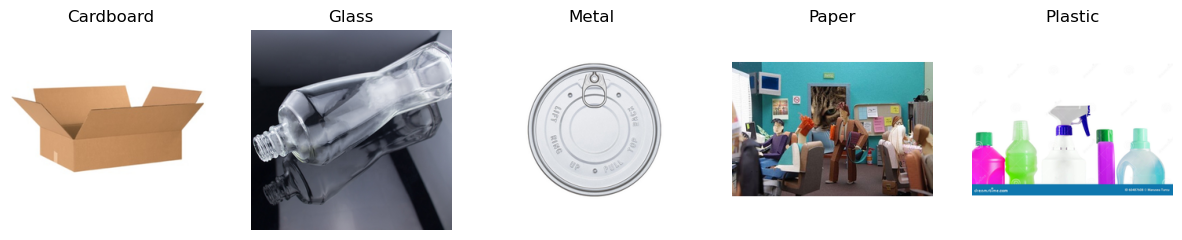

In [11]:
display_random_images(train_dir)

In [12]:
# Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,             # Scale pixel values to [0, 1]
    zoom_range=[0.7, 1.2],         # Random zoom: zoom in and out
    brightness_range=[0.8, 1.2],   # Adjust brightness
    width_shift_range=0.3,         # Horizontal shift
    height_shift_range=0.3,        # Vertical shift
    shear_range=20,                # Shearing to tilt objects
    horizontal_flip=True,          # Flip horizontally
    vertical_flip=False,           # Avoid vertical flip unless needed
    fill_mode="nearest"            # Fill mode for empty pixels after augmentation
)

# Create the train generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,  # Shuffle the images for better training
)



Found 4000 images belonging to 5 classes.


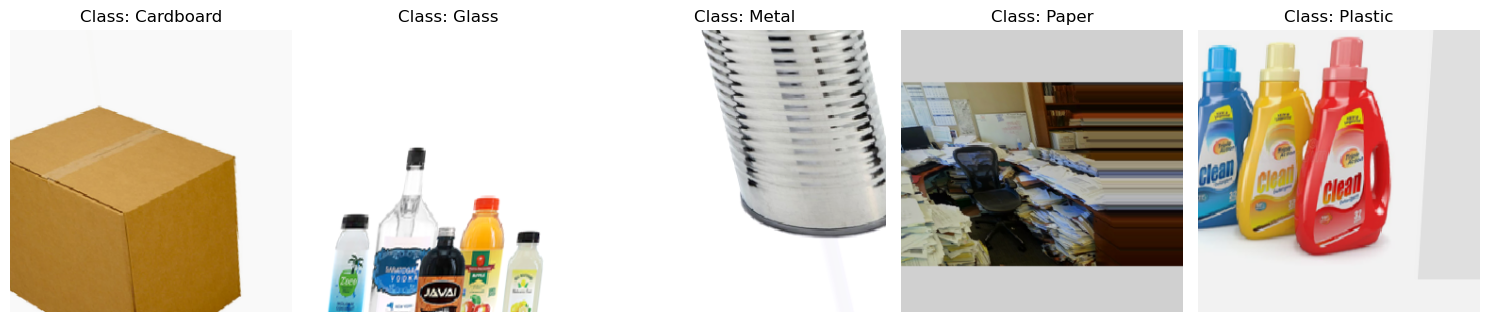

In [13]:
def plot_augmented_images(generator, num_classes=5):
    """
    Plots one preprocessed image from each class after data augmentation.
    """
    class_indices = generator.class_indices
    class_labels = {v: k for k, v in class_indices.items()}  # Reverse class mapping
    fig, axes = plt.subplots(1, num_classes, figsize=(15, 5))
    
    # For each class, find and plot one augmented image
    for class_idx, class_name in class_labels.items():
        for _ in range(50):  # Try to find an image for the given class
            images, labels = next(generator)  # Fetch a batch of augmented images
            for i in range(len(labels)):
                if labels[i][class_idx] == 1:  # Check if this image matches the class
                    axes[class_idx].imshow(images[i])
                    axes[class_idx].set_title(f"Class: {class_name}")
                    axes[class_idx].axis("off")
                    break
            else:
                continue
            break

    plt.tight_layout()
    plt.show()

# Call the function to visualize the augmented images
plot_augmented_images(train_generator, num_classes=len(train_generator.class_indices))

In [14]:
validate_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [15]:
validate_generator = validate_datagen.flow_from_directory(
    validate_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
)

Found 500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [16]:
print(train_generator.class_indices)

{'Cardboard': 0, 'Glass': 1, 'Metal': 2, 'Paper': 3, 'Plastic': 4}


In [18]:
# Load the pre-trained Xception model
base_model = Xception(weights="imagenet", include_top=False, input_shape=(299, 299, 3))
base_model.trainable = False  # Freeze the base model

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(num_classes, activation="softmax")(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
learning_rate = 0.001  # Initial learning rate
model.compile(optimizer=Adam(learning_rate=learning_rate), loss="categorical_crossentropy", metrics=["accuracy"])

# Summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 149, 149, 32)         0         ['block1_conv1_bn[0][0]'] 

                                                                                                  
 block4_sepconv2_act (Activ  (None, 37, 37, 728)          0         ['block4_sepconv1_bn[0][0]']  
 ation)                                                                                           
                                                                                                  
 block4_sepconv2 (Separable  (None, 37, 37, 728)          536536    ['block4_sepconv2_act[0][0]'] 
 Conv2D)                                                                                          
                                                                                                  
 block4_sepconv2_bn (BatchN  (None, 37, 37, 728)          2912      ['block4_sepconv2[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 conv2d_2 

                                                                                                  
 block7_sepconv1 (Separable  (None, 19, 19, 728)          536536    ['block7_sepconv1_act[0][0]'] 
 Conv2D)                                                                                          
                                                                                                  
 block7_sepconv1_bn (BatchN  (None, 19, 19, 728)          2912      ['block7_sepconv1[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block7_sepconv2_act (Activ  (None, 19, 19, 728)          0         ['block7_sepconv1_bn[0][0]']  
 ation)                                                                                           
                                                                                                  
 block7_se

 ormalization)                                                                                    
                                                                                                  
 add_7 (Add)                 (None, 19, 19, 728)          0         ['block9_sepconv3_bn[0][0]',  
                                                                     'add_6[0][0]']               
                                                                                                  
 block10_sepconv1_act (Acti  (None, 19, 19, 728)          0         ['add_7[0][0]']               
 vation)                                                                                          
                                                                                                  
 block10_sepconv1 (Separabl  (None, 19, 19, 728)          536536    ['block10_sepconv1_act[0][0]']
 eConv2D)                                                                                         
          

 block12_sepconv3_act (Acti  (None, 19, 19, 728)          0         ['block12_sepconv2_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 block12_sepconv3 (Separabl  (None, 19, 19, 728)          536536    ['block12_sepconv3_act[0][0]']
 eConv2D)                                                                                         
                                                                                                  
 block12_sepconv3_bn (Batch  (None, 19, 19, 728)          2912      ['block12_sepconv3[0][0]']    
 Normalization)                                                                                   
                                                                                                  
 add_10 (Add)                (None, 19, 19, 728)          0         ['block12_sepconv3_bn[0][0]', 
          

In [19]:
# Train the top layers while the base is frozen
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validate_generator
)


Epoch 1/5
125/125 [==============================] - 611s 5s/step - loss: 0.3687 - accuracy: 0.8810 - val_loss: 0.2000 - val_accuracy: 0.9200
Epoch 2/5
125/125 [==============================] - 451s 4s/step - loss: 0.2352 - accuracy: 0.9165 - val_loss: 0.1762 - val_accuracy: 0.9340
Epoch 3/5
125/125 [==============================] - 263s 2s/step - loss: 0.2038 - accuracy: 0.9255 - val_loss: 0.1365 - val_accuracy: 0.9500
Epoch 4/5
125/125 [==============================] - 254s 2s/step - loss: 0.1848 - accuracy: 0.9367 - val_loss: 0.1247 - val_accuracy: 0.9600
Epoch 5/5
125/125 [==============================] - 252s 2s/step - loss: 0.1735 - accuracy: 0.9405 - val_loss: 0.1135 - val_accuracy: 0.9640


In [20]:
# Unfreeze the last 50 layers for fine-tuning
for layer in base_model.layers[-50:]:
    layer.trainable = True

# Compile the model with a lower learning rate
fine_tune_lr = 1e-5
model.compile(optimizer=Adam(learning_rate=fine_tune_lr), loss="categorical_crossentropy", metrics=["accuracy"])

# Fine-tune the model
fine_tune_history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validate_generator
)


Epoch 1/10
125/125 [==============================] - 492s 4s/step - loss: 0.2284 - accuracy: 0.9227 - val_loss: 0.1055 - val_accuracy: 0.9660
Epoch 2/10
125/125 [==============================] - 484s 4s/step - loss: 0.1843 - accuracy: 0.9317 - val_loss: 0.1013 - val_accuracy: 0.9680
Epoch 3/10
125/125 [==============================] - 488s 4s/step - loss: 0.1474 - accuracy: 0.9492 - val_loss: 0.0941 - val_accuracy: 0.9720
Epoch 4/10
125/125 [==============================] - 482s 4s/step - loss: 0.1359 - accuracy: 0.9528 - val_loss: 0.0928 - val_accuracy: 0.9680
Epoch 5/10
125/125 [==============================] - 485s 4s/step - loss: 0.1119 - accuracy: 0.9592 - val_loss: 0.0869 - val_accuracy: 0.9700
Epoch 6/10
125/125 [==============================] - 493s 4s/step - loss: 0.1007 - accuracy: 0.9632 - val_loss: 0.0834 - val_accuracy: 0.9700
Epoch 7/10
125/125 [==============================] - 490s 4s/step - loss: 0.1063 - accuracy: 0.9615 - val_loss: 0.0804 - val_accuracy: 0.9740

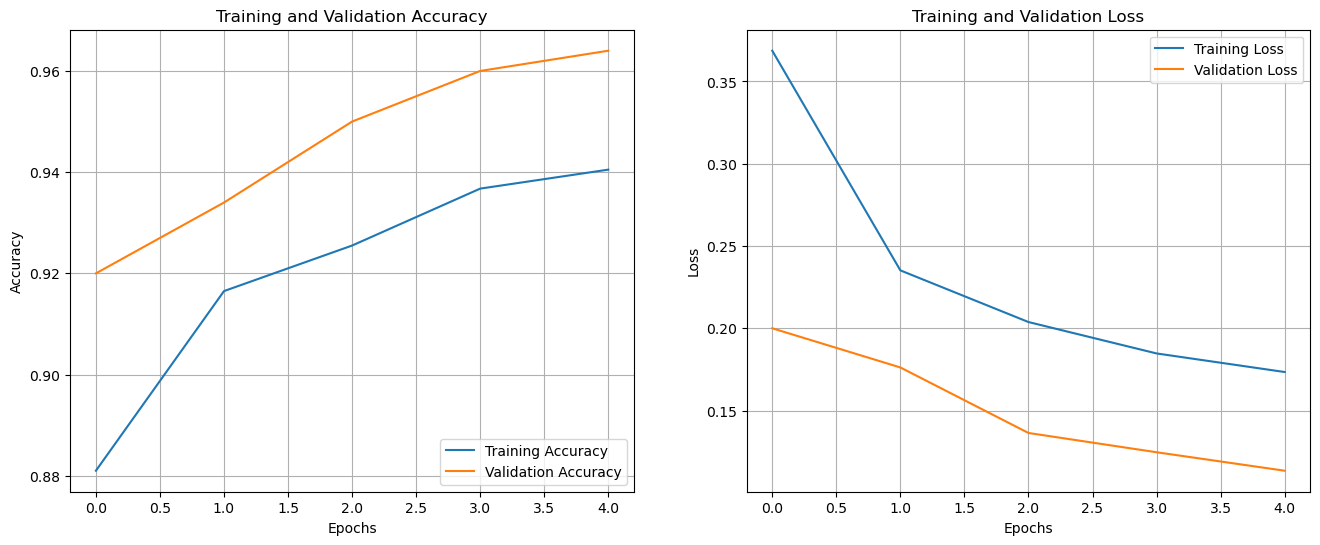

In [22]:
# Combined accuracy and loss plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))
# Plot accuracy
ax1.plot(epochs_range, train_accuracy, label='Training Accuracy')
ax1.plot(epochs_range, val_accuracy, label='Validation Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')
ax1.grid()

# Plot loss
ax2.plot(epochs_range, train_loss, label='Training Loss')
ax2.plot(epochs_range, val_loss, label='Validation Loss')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend(loc='upper right')
ax2.grid()

plt.show()


In [43]:
# Save the model
model.save("xception_material_classifier.h5")

C:\Users\COMPUMARTS\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image
import os

# Paths

model_path = "xception_material_classifier.h5"

# Load the trained model
model = load_model(model_path)

# Preprocessing function for testing
def preprocess_image(img_path, target_size=(299, 299)):
    img = Image.open(img_path).convert("RGB")
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0  # Normalize pixel values
    return np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict for a single image
def predict_single_image(model, img_path):
    processed_image = preprocess_image(img_path)
    prediction = model.predict(processed_image)
    class_idx = np.argmax(prediction, axis=1)[0]
    class_labels = {v: k for k, v in train_generator.class_indices.items()}  # Get class names
    return class_labels[class_idx], prediction[0][class_idx]


In [24]:
predict_single_image(model, r"C:\Users\COMPUMARTS\Downloads\New\Split\train\Plastic\Image_2_2.png")

1/1 [==============================] - 1s 589ms/step


('Plastic', 1.0)

In [25]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predict on a few random test images
print("Testing random images...")
for i in range(5):  # Test 5 random images
    random_class = random.choice(os.listdir(test_dir))
    random_image = random.choice(os.listdir(os.path.join(test_dir, random_class)))
    random_image_path = os.path.join(test_dir, random_class, random_image)
    predicted_class, confidence = predict_single_image(model, random_image_path)
    print(f"Image: {random_image}, Predicted: {predicted_class}, Confidence: {confidence:.2f}")

16/16 [==============================] - 27s 2s/step - loss: 0.0963 - accuracy: 0.9720
Test Accuracy: 0.97
Testing random images...
1/1 [==============================] - 0s 163ms/step
Image: Image_33_2.png, Predicted: Metal, Confidence: 1.00
1/1 [==============================] - 0s 117ms/step
Image: Image_99_1.png, Predicted: Paper, Confidence: 0.88
1/1 [==============================] - 0s 115ms/step
Image: Image_143.png, Predicted: Glass, Confidence: 1.00
1/1 [==============================] - 0s 112ms/step
Image: Image_209_2.png, Predicted: Metal, Confidence: 0.99
1/1 [==============================] - 0s 117ms/step
Image: Image_204_3.png, Predicted: Paper, Confidence: 0.48


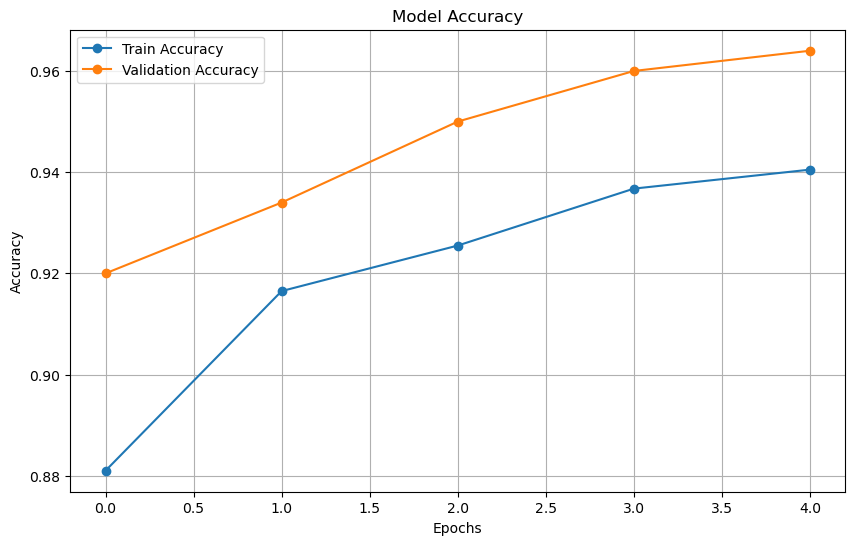

In [26]:
import matplotlib.pyplot as plt

# Assuming `history` is the result of `model.fit`
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


16/16 [==============================] - 27s 2s/step


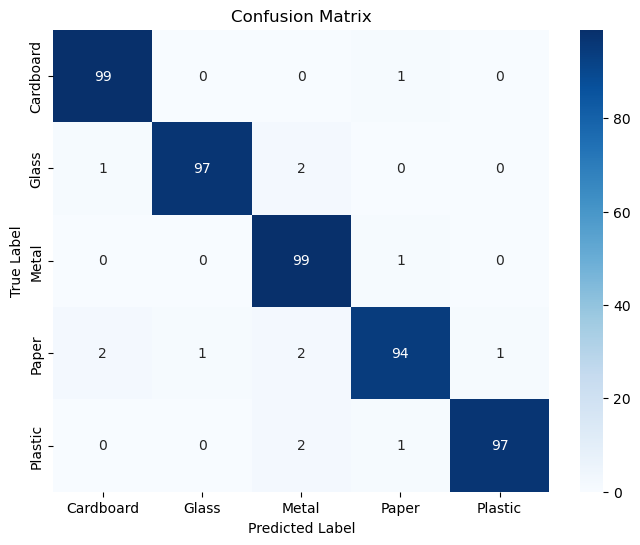

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming `y_true` and `y_pred` are the true labels and model predictions
y_pred = model.predict(test_generator)  # Replace `test_generator` with your test dataset
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class indices
y_true = test_generator.classes          # True labels from the generator

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [29]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys(), output_dict=True)

# Extract metrics
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


Precision: 0.97
Recall: 0.97
F1 Score: 0.97


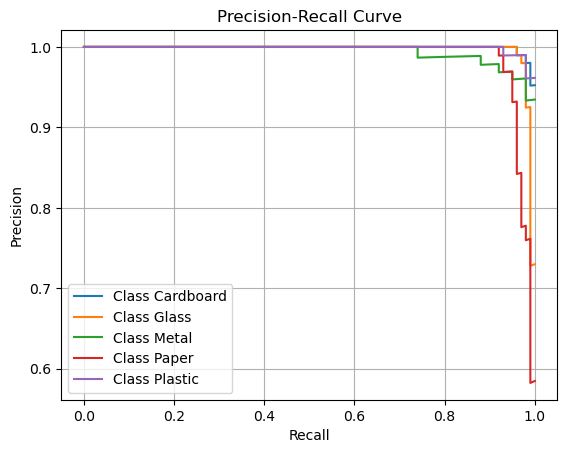

In [30]:
from sklearn.metrics import precision_recall_curve

# Assuming `y_true` and `y_pred` probabilities are available for all classes
for i, class_name in enumerate(test_generator.class_indices.keys()):
    precision, recall, _ = precision_recall_curve(y_true == i, y_pred[:, i])
    plt.plot(recall, precision, label=f"Class {class_name}")

plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()


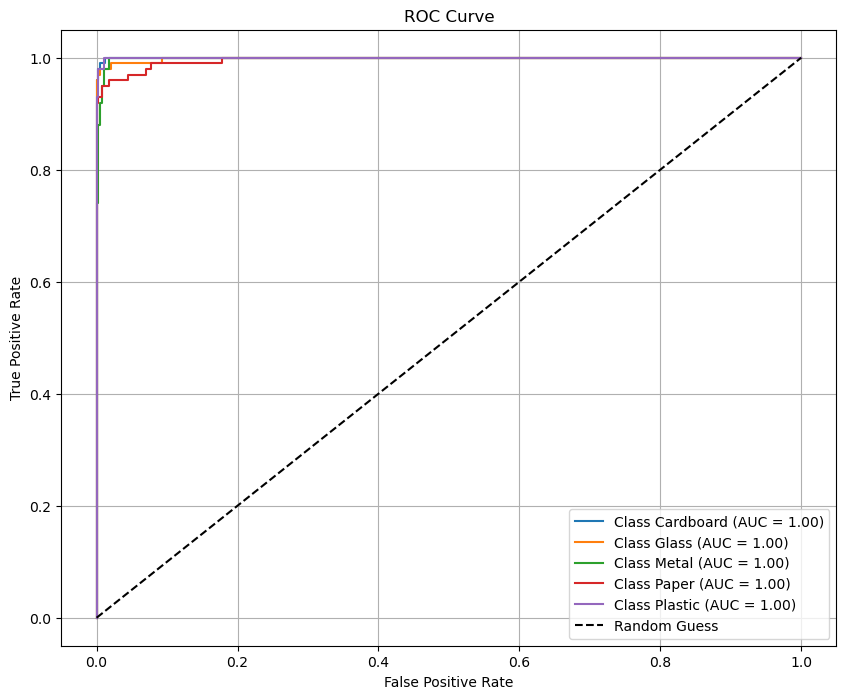

In [31]:
from sklearn.metrics import roc_curve, auc

# Plot ROC Curve for each class
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(test_generator.class_indices.keys()):
    fpr, tpr, _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {class_name} (AUC = {roc_auc:.2f})")

# Plot random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


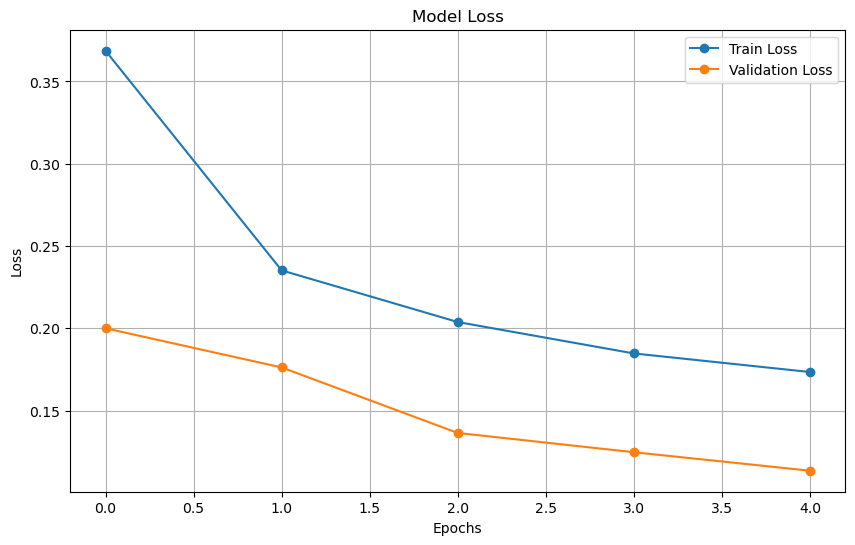

In [32]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
